**Shibu Mohapatra MSC AI**

# UNIT 5: Statistical Techniques in Natural Language Processing

## Exploratory Data Analysis

In [27]:
import pandas as pd
import numpy as np

news= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/abcnews-date-text.csv',nrows=10000)
news.head(3)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit


### Analyzing text statistics

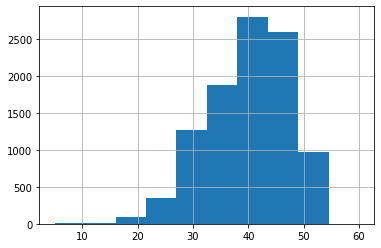

In [28]:
news['headline_text'].str.len().hist()

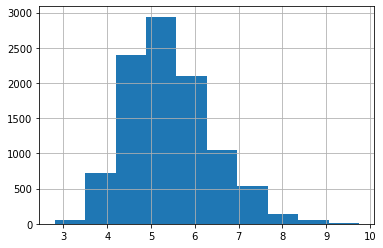

In [29]:
news['headline_text'].str.split().\
apply(lambda x : [len(i) for i in x]). \
map(lambda x: np.mean(x)).hist()

In [30]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
corpus=[]
new= news['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

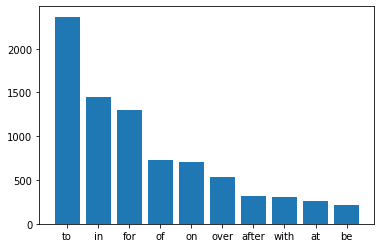

In [33]:
plot_top_stopwords_barchart(news['headline_text'])

In [34]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()

    x, y= [], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

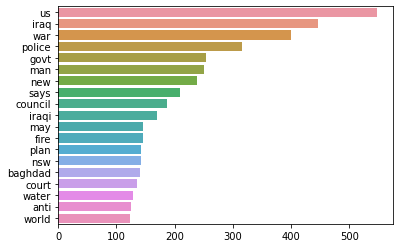

In [35]:
plot_top_non_stopwords_barchart(news['headline_text'])

### Ngram exploration

In [36]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [37]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

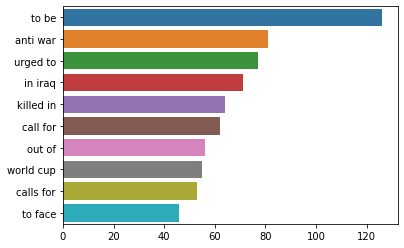

In [38]:
plot_top_ngrams_barchart(news['headline_text'],2)

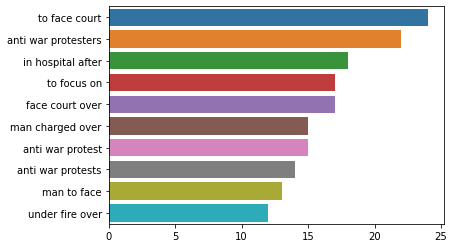

In [39]:
plot_top_ngrams_barchart(news['headline_text'],3)

### Wordcloud

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


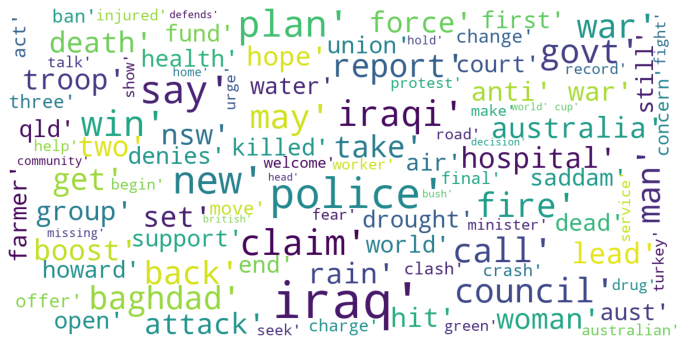

In [41]:
plot_wordcloud(news['headline_text'])

### Sentiment analysis using Textblob

In [42]:
from textblob import TextBlob
    
def plot_polarity_histogram(text):
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    polarity_score.hist()

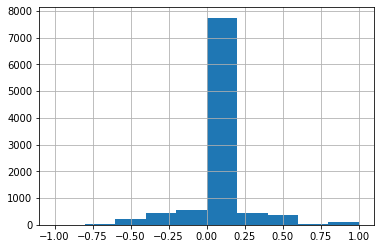

In [43]:
plot_polarity_histogram(news['headline_text'])

In [44]:
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


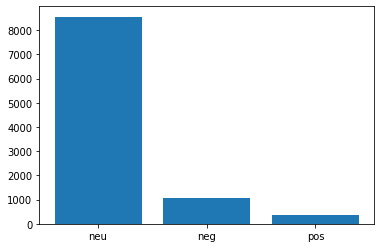

In [45]:
plot_sentiment_barchart(news['headline_text'], method='Vader')

### Parts of speech tagging

In [46]:
import nltk
nltk.download('averaged_perceptron_tagger')
sentence="The greatest comeback stories in 2019"
tokens=word_tokenize(sentence)
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('The', 'DT'),
 ('greatest', 'JJS'),
 ('comeback', 'NN'),
 ('stories', 'NNS'),
 ('in', 'IN'),
 ('2019', 'CD')]

In [49]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp('The greatest comeback stories in 2019')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

In [50]:
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter

def plot_parts_of_speach_barchart(text):
    nltk.download('averaged_perceptron_tagger')

    def _get_pos(text):
        pos=nltk.pos_tag(word_tokenize(text))
        pos=list(map(list,zip(*pos)))[1]
        return pos
    
    tags=text.apply(lambda x : _get_pos(x))
    tags=[x for l in tags for x in l]
    counter=Counter(tags)
    x,y=list(map(list,zip(*counter.most_common(7))))
    
    sns.barplot(x=y,y=x)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


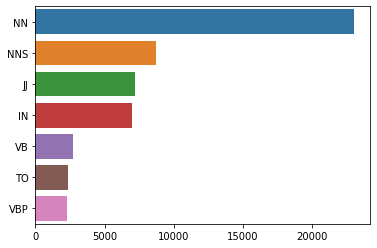

In [51]:
plot_parts_of_speach_barchart(news['headline_text'])

In [52]:
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter

def plot_most_common_part_of_speach_barchart(text, part_of_speach='NN'):
    nltk.download('averaged_perceptron_tagger')
    
    def _filter_pos(text):
        pos_type=[]
        pos=nltk.pos_tag(word_tokenize(text))
        for word,tag in pos:
            if tag==part_of_speach:
                pos_type.append(word)
        return pos_type


    words=text.apply(lambda x : _filter_pos(x))
    words=[x for l in words for x in l]
    counter=Counter(words)
    x,y=list(map(list,zip(*counter.most_common(7))))
    sns.barplot(x=y,y=x).set_title(part_of_speach)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


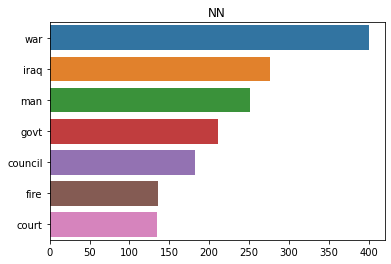

In [53]:
plot_most_common_part_of_speach_barchart(news['headline_text'])

### Exploring through text complexity

In [54]:
!pip install textstat

     |████████████████████████████████| 105 kB 8.2 MB/s 
     |████████████████████████████████| 2.0 MB 41.0 MB/s 


In [55]:
from textstat import flesch_reading_ease

def plot_text_complexity_histogram(text):
    text.\
        apply(lambda x : flesch_reading_ease(x)).\
        hist()

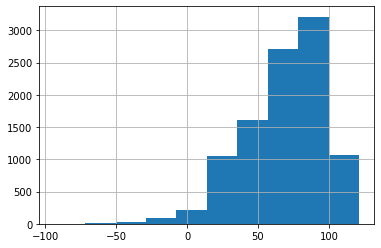

In [56]:
plot_text_complexity_histogram(news['headline_text'])

## Statistical Language Model

### Importing libraries

In [83]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, Embedding
from keras.callbacks import EarlyStopping, ModelCheckpoint

### reading dataset

In [85]:
data_text = """The unanimous Declaration of the thirteen united States of America, When in the Course of human events, it becomes necessary for one people to dissolve the political bands which have connected them with another, and to assume among the powers of the earth, the separate and equal station to which the Laws of Nature and of Nature's God entitle them, a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation.
We hold these truths to be self-evident, that all men are created equal, that they are endowed by their Creator with certain unalienable Rights, that among these are Life, Liberty and the pursuit of Happiness.--That to secure these rights, Governments are instituted among Men, deriving their just powers from the consent of the governed, --That whenever any Form of Government becomes destructive of these ends, it is the Right of the People to alter or to abolish it, and to institute new Government, laying its foundation on such principles and organizing its powers in such form, as to them shall seem most likely to effect their Safety and Happiness. 
Prudence, indeed, will dictate that Governments long established should not be changed for light and transient causes; and accordingly all experience hath shewn, that mankind are more disposed to suffer, while evils are sufferable, than to right themselves by abolishing the forms to which they are accustomed. But when a long train of abuses and usurpations, pursuing invariably the same Object evinces a design to reduce them under absolute Despotism, it is their right, it is their duty, to throw off such Government, and to provide new Guards for their future security.--Such has been the patient sufferance of these Colonies; and such is now the necessity which constrains them to alter their former Systems of Government."""

### Preprocessing the Text Data

In [86]:
import re

def text_cleaner(text):

    # lower case text
    newString = text.lower()
    newString = re.sub(r"'s\b","",newString)

    # remove punctuations
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    long_words=[]

    # remove short word
    for i in newString.split():
        if len(i)>=3:                  
            long_words.append(i)
    return (" ".join(long_words)).strip()

In [87]:
# preprocess the text
data_new = text_cleaner(data_text)

### creating sequences

In [88]:
def create_seq(text):
    length = 30
    sequences = list()

    for i in range(length, len(text)):

        # select sequence of tokens
        seq = text[i-length:i+1]

        # store
        sequences.append(seq)
    print('Total Sequences: %d' % len(sequences))
    return sequences

In [89]:
# create sequences   
sequences = create_seq(data_new)

Total Sequences: 1623


### Encoding sequences

In [90]:
# create a character mapping index
chars = sorted(list(set(data_new)))
mapping = dict((c, i) for i, c in enumerate(chars))

def encode_seq(seq):
    sequences = list()
    for line in seq:

        # integer encode line
        encoded_seq = [mapping[char] for char in line]

        # store
        sequences.append(encoded_seq)
    return sequences

In [91]:
# encode the sequences
sequences = encode_seq(sequences)
print(sequences)

[[20, 8, 5, 0, 21, 14, 1, 14, 9, 13, 15, 21, 19, 0, 4, 5, 3, 12, 1, 18, 1, 20, 9, 15, 14, 0, 20, 8, 5, 0, 20], [8, 5, 0, 21, 14, 1, 14, 9, 13, 15, 21, 19, 0, 4, 5, 3, 12, 1, 18, 1, 20, 9, 15, 14, 0, 20, 8, 5, 0, 20, 8], [5, 0, 21, 14, 1, 14, 9, 13, 15, 21, 19, 0, 4, 5, 3, 12, 1, 18, 1, 20, 9, 15, 14, 0, 20, 8, 5, 0, 20, 8, 9], [0, 21, 14, 1, 14, 9, 13, 15, 21, 19, 0, 4, 5, 3, 12, 1, 18, 1, 20, 9, 15, 14, 0, 20, 8, 5, 0, 20, 8, 9, 18], [21, 14, 1, 14, 9, 13, 15, 21, 19, 0, 4, 5, 3, 12, 1, 18, 1, 20, 9, 15, 14, 0, 20, 8, 5, 0, 20, 8, 9, 18, 20], [14, 1, 14, 9, 13, 15, 21, 19, 0, 4, 5, 3, 12, 1, 18, 1, 20, 9, 15, 14, 0, 20, 8, 5, 0, 20, 8, 9, 18, 20, 5], [1, 14, 9, 13, 15, 21, 19, 0, 4, 5, 3, 12, 1, 18, 1, 20, 9, 15, 14, 0, 20, 8, 5, 0, 20, 8, 9, 18, 20, 5, 5], [14, 9, 13, 15, 21, 19, 0, 4, 5, 3, 12, 1, 18, 1, 20, 9, 15, 14, 0, 20, 8, 5, 0, 20, 8, 9, 18, 20, 5, 5, 14], [9, 13, 15, 21, 19, 0, 4, 5, 3, 12, 1, 18, 1, 20, 9, 15, 14, 0, 20, 8, 5, 0, 20, 8, 9, 18, 20, 5, 5, 14, 0], [13, 15, 21,

### Create Training and Validation set

In [92]:
from sklearn.model_selection import train_test_split

# vocabulary size
vocab = len(mapping)
sequences = np.array(sequences)
print(sequences)

[[20  8  5 ...  5  0 20]
 [ 8  5  0 ...  0 20  8]
 [ 5  0 21 ... 20  8  9]
 ...
 [18  0 20 ... 14 13  5]
 [ 0 20  8 ... 13  5 14]
 [20  8  5 ...  5 14 20]]


In [93]:
# create X and y
X, y = sequences[:,:-1], sequences[:,-1]

In [94]:
# one hot encode y
y = to_categorical(y, num_classes=vocab)

In [95]:
# create train and validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print('Train shape:', X_tr.shape, 'Val shape:', X_val.shape)

Train shape: (1460, 30) Val shape: (163, 30)


### Model building 

In [96]:
# define model
model = Sequential()
model.add(Embedding(vocab, 50, input_length=30, trainable=True))
model.add(GRU(150, recurrent_dropout=0.1, dropout=0.1))
model.add(Dense(vocab, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 50)            1350      
                                                                 
 gru_1 (GRU)                 (None, 150)               90900     
                                                                 
 dense_1 (Dense)             (None, 27)                4077      
                                                                 
Total params: 96,327
Trainable params: 96,327
Non-trainable params: 0
_________________________________________________________________
None


In [97]:
# compile the model
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [98]:
# fit the model
model.fit(X_tr, y_tr, epochs=100, verbose=2, validation_data=(X_val, y_val))

Epoch 1/100
46/46 - 7s - loss: 2.9900 - acc: 0.1466 - val_loss: 2.8521 - val_acc: 0.1718 - 7s/epoch - 153ms/step
Epoch 2/100
46/46 - 4s - loss: 2.8081 - acc: 0.1753 - val_loss: 2.7317 - val_acc: 0.1840 - 4s/epoch - 93ms/step
Epoch 3/100
46/46 - 5s - loss: 2.6294 - acc: 0.2315 - val_loss: 2.5064 - val_acc: 0.3497 - 5s/epoch - 117ms/step
Epoch 4/100
46/46 - 6s - loss: 2.4135 - acc: 0.3158 - val_loss: 2.3401 - val_acc: 0.3497 - 6s/epoch - 136ms/step
Epoch 5/100
46/46 - 6s - loss: 2.2864 - acc: 0.3384 - val_loss: 2.2786 - val_acc: 0.3620 - 6s/epoch - 132ms/step
Epoch 6/100
46/46 - 5s - loss: 2.2116 - acc: 0.3425 - val_loss: 2.3036 - val_acc: 0.3497 - 5s/epoch - 106ms/step
Epoch 7/100
46/46 - 4s - loss: 2.1356 - acc: 0.3637 - val_loss: 2.2320 - val_acc: 0.3681 - 4s/epoch - 77ms/step
Epoch 8/100
46/46 - 4s - loss: 2.0788 - acc: 0.3918 - val_loss: 2.2454 - val_acc: 0.3436 - 4s/epoch - 76ms/step
Epoch 9/100
46/46 - 4s - loss: 2.0301 - acc: 0.3932 - val_loss: 2.2264 - val_acc: 0.3620 - 4s/epoch

### Statistical Inference

In [99]:
# generate a sequence of characters with a language model
def generate_seq(model, mapping, seq_length, seed_text, n_chars):
	in_text = seed_text

	# generate a fixed number of characters
	for _ in range(n_chars):
   
		# encode the characters as integers
		encoded = [mapping[char] for char in in_text]

		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
  
		# predict character
		yhat = model.predict_classes(encoded, verbose=0)
  
		# reverse map integer to character
		out_char = ''
		for char, index in mapping.items():
			if index == yhat:
				out_char = char
				break
        
		# append to input
		in_text += char
	return in_text

## Maximum Likelihood Estimate (MLE)

In [57]:
# import the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [58]:
# create an independent variable 
x = np.linspace(-10, 30, 100)

# create a normally distributed residual
e = np.random.normal(10, 5, 100)

# generate ground truth
y = 10 + 4*x + e

df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-24.372250
1,-9.595960,-20.291434
2,-9.191919,-26.620738
3,-8.787879,-23.437360
4,-8.383838,-8.545173


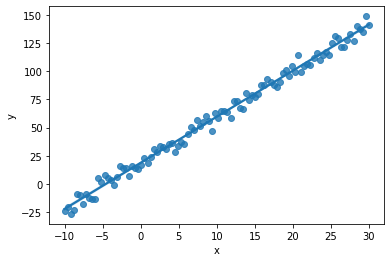

In [59]:
# visualize data distribution
sns.regplot(x='x', y='y', data = df)
plt.show()

In [60]:
# OLS approach

features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.002e+04
Date:                Fri, 01 Apr 2022   Prob (F-statistic):          1.73e-100
Time:                        17:31:57   Log-Likelihood:                -296.97
No. Observations:                 100   AIC:                             597.9
Df Residuals:                      98   BIC:                             603.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6766      0.627     29.769      0.000      17.432      19.922
x              4.0868      0.041    100.078      0.000       4.006       4.168
==============================================================================
Omnibus:                        3.768   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.129
Skew:                           0.065   Prob(JB):                        0.345
Kurtosis:                       2.297   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# find the std dev
res = model.resid
standard_dev = np.std(res)
standard_dev

4.714899686326753

In [62]:
# MLE approach

def MLE_Norm(parameters):
  const, beta, std_dev = parameters
  pred = const + beta*x

  LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
  neg_LL = -1*LL
  return neg_LL


In [63]:
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

      fun: nan
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.62191248, -2.75032335,  7.25115115])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 248
      nit: 18
   status: 2
  success: False
        x: array([19.22099432,  4.05880884,  6.51851147])

We can find that the parameters obtained through MLE is matching with that of the OLS approach.